# Google trends analysis

### Objective:
> #### Design a full stack application for Google trends of keywords using the data collected from API 

### Steps
1. Import libraries
2. Pilot with API
3. Emulation of charts from Client template
4. Design of functions
5. Design output layer using Dash/dasboard tool

## 1. Import Libraries

In [86]:
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

from pytrends.request import TrendReq

## 2. Pilot with API 

### Pytrends

#### References: https://github.com/GeneralMills/pytrends

### With single keyword

In [296]:
# Only need to run this once, the rest of requests will use the same session.
pytrend = TrendReq(geo='IN')

# Create payload and capture API tokens. Only needed for interest_over_time(), interest_by_region() & related_queries()
pytrend.build_payload(kw_list=['coconut milk'],cat=71)
#pytrend.build_payload(kw_list=['coconut milk'],cat=45)
#pytrend.build_payload(kw_list=['coconut milk','almond milk','soy milk','rice milk'])

# Interest Over Time
interest_over_time_df = pytrend.interest_over_time()
print(interest_over_time_df.head())

# Interest by Region
interest_by_region_df = pytrend.interest_by_region(resolution='COUNTRY')
print(interest_by_region_df.head())

# Related Queries, returns a dictionary of dataframes
related_queries_dict = pytrend.related_queries()
print(related_queries_dict)


            coconut milk isPartial
date                              
2015-05-24            47     False
2015-05-31            57     False
2015-06-07            48     False
2015-06-14            57     False
2015-06-21            58     False
                             coconut milk
geoName                                  
Andaman and Nicobar Islands             0
Andhra Pradesh                         18
Arunachal Pradesh                       0
Assam                                  13
Bihar                                   3
{'coconut milk': {'top':                               query  value
0               coconut milk recipe    100
1                coconut milk curry     71
2                      coconut rice     50
3                 coconut milk rice     49
4          recipe with coconut milk     38
5              coconut milk recipes     37
6               coconut milk powder     32
7          how to make coconut milk     30
8                    coconut powder     30
9     

### With many keywords

In [300]:
# Only need to run this once, the rest of requests will use the same session.
pytrend = TrendReq(geo='IN')

# Create payload and capture API tokens. Only needed for interest_over_time(), interest_by_region() & related_queries()
pytrend.build_payload(kw_list=['coconut milk','almond milk','soy milk','rice milk'])

# Interest Over Time
interest_over_time_df = pytrend.interest_over_time()
print(interest_over_time_df.head())

# Interest by Region
interest_by_region_df = pytrend.interest_by_region()
print(interest_by_region_df.head())

# Related Queries, returns a dictionary of dataframes
related_queries_dict = pytrend.related_queries()
print(related_queries_dict)


            coconut milk  almond milk  soy milk  rice milk isPartial
date                                                                
2015-05-24            64           18        15         28     False
2015-05-31            63           16        16         31     False
2015-06-07            48           12        18         18     False
2015-06-14            70           10        13         28     False
2015-06-21            55           22        17         32     False
                             coconut milk  almond milk  soy milk  rice milk
geoName                                                                    
Andaman and Nicobar Islands             0            0         0          0
Andhra Pradesh                         40           20        12         28
Arunachal Pradesh                       0            0         0          0
Assam                                  40           18        13         29
Bihar                                  32           23       

### Access from dictionary "related_queries_dict"

In [77]:
related_queries_dict['coconut milk']['top'].head(5)

,query,value
0,coconut milk recipe,100
1,coconut milk for hair,65
2,how to make coconut milk,55
3,coconut oil,54
4,coconut rice,52


In [78]:
related_queries_dict['coconut milk']['rising'].head(5)

,query,value
0,wow coconut milk shampoo,106950
1,wow shampoo,106700
2,ogx coconut milk shampoo,67550
3,wow coconut milk conditioner,25200
4,wow coconut milk shampoo review,23950


## 3. Emulation of charts from client template

In [276]:
pytrend.build_payload(kw_list=['coconut milk'],cat=45,timeframe='2018-04-15 2020-05-03')

### Interest Over Region

In [287]:
# Interest by Region
interest_by_region_df = pytrend.interest_by_region(resolution='COUNTRY').reset_index()
interest_by_region_df.head()

,geoName,coconut milk
0,Andaman and Nicobar Islands,0
1,Andhra Pradesh,27
2,Arunachal Pradesh,0
3,Assam,13
4,Bihar,5


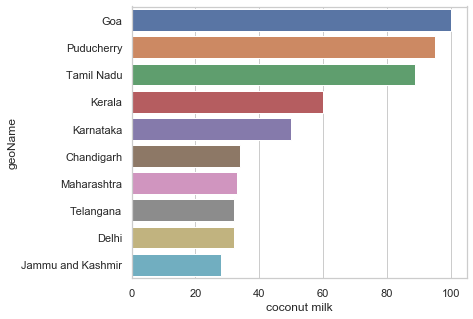

In [289]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 5))

# Sort
interest_by_region_df = interest_by_region_df.sort_values("coconut milk", ascending=False).head(10)

# Plot
sns.set_color_codes("pastel")
sns.barplot(x="coconut milk", y="geoName", data=interest_by_region_df)

### Top related queries 

In [268]:
# Related Queries, returns a dictionary of dataframes
related_queries_dict = pytrend.related_queries()
top_related_queries_dict = related_queries_dict['coconut milk']['top']

In [270]:
top_related_queries_dict.head()

,query,value
0,coconut milk recipe,100
1,coconut milk curry,67
2,coconut rice,52
3,coconut milk rice,51
4,recipe with coconut milk,38


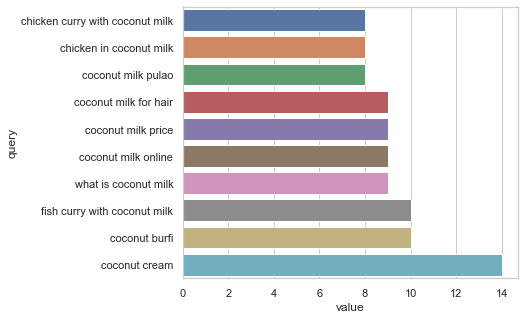

In [271]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 5))

# Sort
top_related_queries_dict = top_related_queries_dict.sort_values("value", ascending=True).head(10)

# Plot
sns.set_color_codes("pastel")
sns.barplot(x="value", y="query", data=top_related_queries_dict)

### Interest over time

In [291]:
# Interest Over Time
interest_over_time_df = pytrend.interest_over_time().reset_index()
interest_over_time_df.head()

,date,coconut milk,isPartial
0,2018-04-15,75,False
1,2018-04-22,60,False
2,2018-04-29,58,False
3,2018-05-06,48,False
4,2018-05-13,37,False


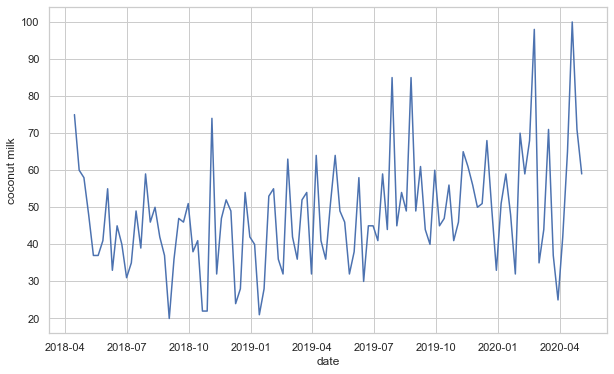

In [292]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 6))

sns.lineplot(x="date", y="coconut milk", data=interest_over_time_df)

### Interest over time - Types of Milk
#### Health

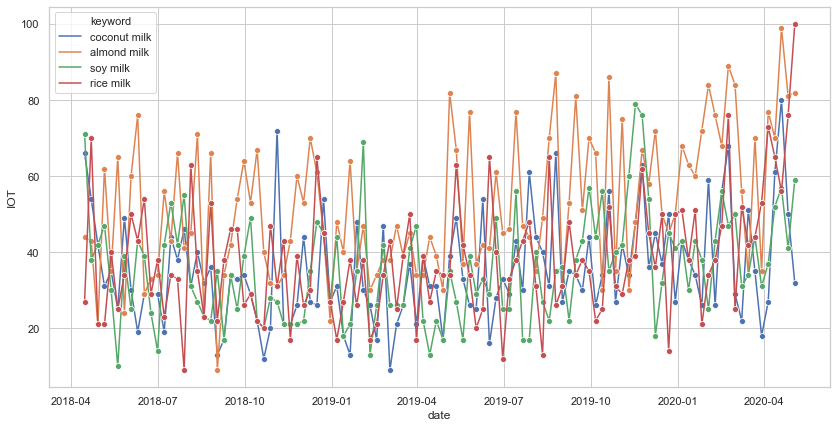

In [293]:
# Health
pytrend.build_payload(kw_list=['coconut milk','almond milk','soy milk','rice milk'],cat=45,timeframe='2018-04-15 2020-05-03')
interest_over_time_df = pytrend.interest_over_time().reset_index()

data1=interest_over_time_df.melt(id_vars =['date'], value_vars =['coconut milk','almond milk','soy milk','rice milk'],  
        var_name ='keyword', value_name ='IOT') 
data1 = data1[pd.notnull(data1['IOT'])]

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(14, 7))

sns.lineplot(x='date', y='IOT',hue='keyword',marker='o',data=data1)

#### Food & drink

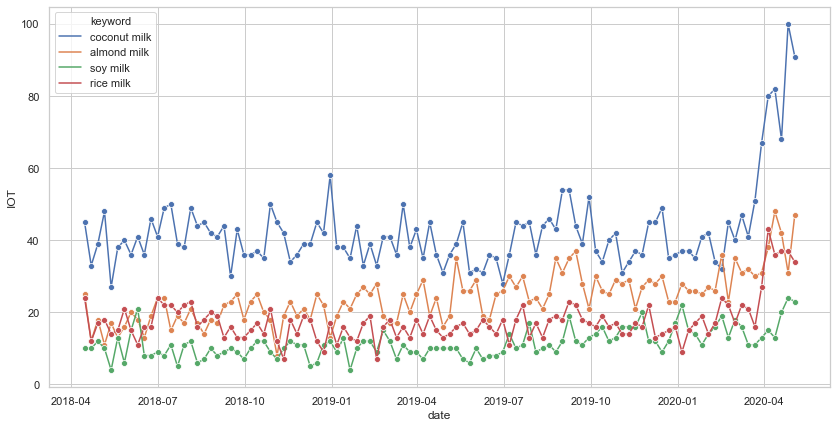

In [294]:
# Food & Drink
pytrend.build_payload(kw_list=['coconut milk','almond milk','soy milk','rice milk'],cat=71,timeframe='2018-04-15 2020-05-03')
interest_over_time_df = pytrend.interest_over_time().reset_index()

data1=interest_over_time_df.melt(id_vars =['date'], value_vars =['coconut milk','almond milk','soy milk','rice milk'],  
        var_name ='keyword', value_name ='IOT') 
data1 = data1[pd.notnull(data1['IOT'])]

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(14, 7))

sns.lineplot(x='date', y='IOT',hue='keyword',marker='o',data=data1)

## 4. Design of functions

In [175]:
def googleTrendsApi(keywords,user_cat,user_geo,user_timeframe):
    pytrend = TrendReq()
    pytrend.build_payload(kw_list=keywords,cat=user_cat,timeframe = user_timeframe,geo = user_geo)
    
    # Interest by Region
    interest_by_region_df = pytrend.interest_by_region(resolution='COUNTRY').reset_index()
    
    # Related Queries, returns a dictionary of dataframes
    related_queries_dict = pytrend.related_queries()
    top_related_queries_dict = related_queries_dict[keywords[0]]['top']
    
    # Interest Over Time
    interest_over_time_df = pytrend.interest_over_time().reset_index()
    interest_over_time_df = interest_over_time_df.drop(['isPartial'],axis=1)
    interest_over_time_df.head()
    
    return interest_by_region_df,top_related_queries_dict,interest_over_time_df

In [198]:
IoR,TRQ,IoT = googleTrendsApi(['coconut milk'],45,'IN','2018-04-15 2020-05-03')

In [255]:
def googleTrendsCharts(IoR,TRQ,IoT):
    IoR.rename(columns={ IoR.columns[1]: 'keyword' }, inplace = True)
    IoT.rename(columns={ IoT.columns[1]: 'keyword' }, inplace = True)
    
    # Initialize the matplotlib figure
    f, axs = plt.subplots(3,1,figsize=(12, 16))
    
    # Sort
    IoR = IoR.sort_values("keyword", ascending=False).head(10)
    TRQ = TRQ.sort_values("value", ascending=False).head(10)

    # Plot
    sns.set_color_codes("pastel")
    sns.barplot(x="keyword", y="geoName", ax=axs[0], data=IoR).set(title = 'Interest over Region', xlabel = 'Value', ylabel = 'Region' )
    sns.barplot(x="value", y="query", ax=axs[1], data=TRQ).set(title = 'Top related queries', xlabel = 'Value', ylabel = 'Query' )
    sns.lineplot(x="date", y="keyword", ax=axs[2], data=IoT).set(title = 'Interest over Time', xlabel = 'Time', ylabel = 'Value' )

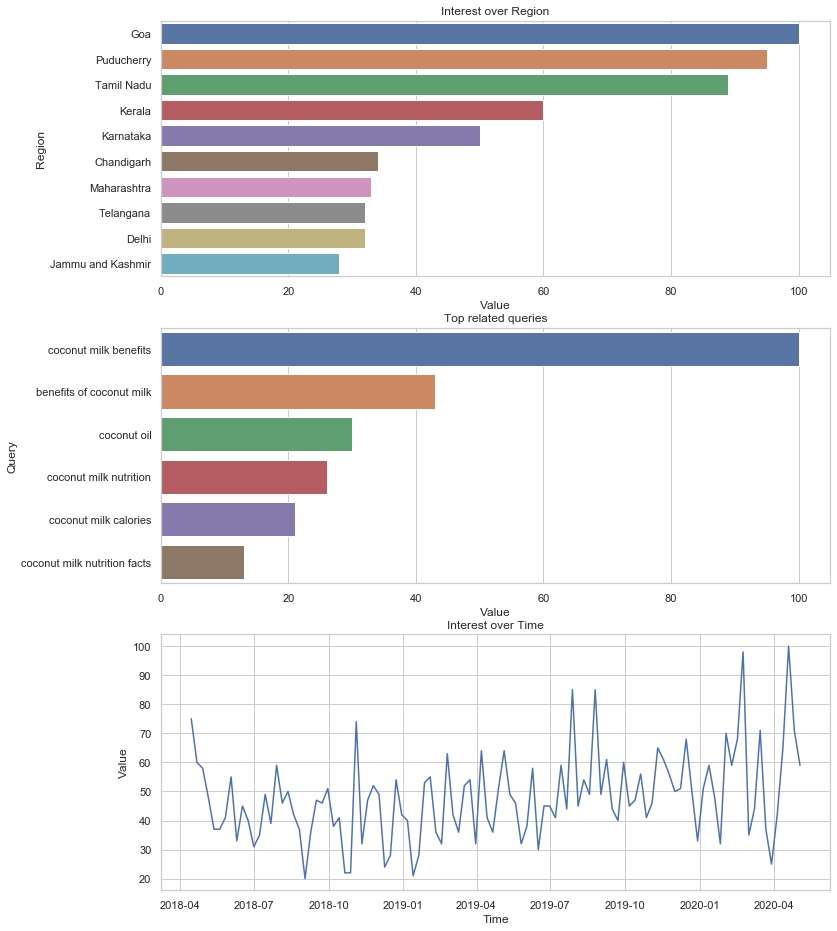

In [256]:
googleTrendsCharts(IoR,TRQ,IoT)